In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/HP/Downloads/unemployment in india.csv")

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [5]:
df.shape

(768, 7)

In [6]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [10]:
df.shape

(740, 7)

In [11]:
df.duplicated().sum()

0

In [34]:
df.columns = df.columns.str.strip()

In [36]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

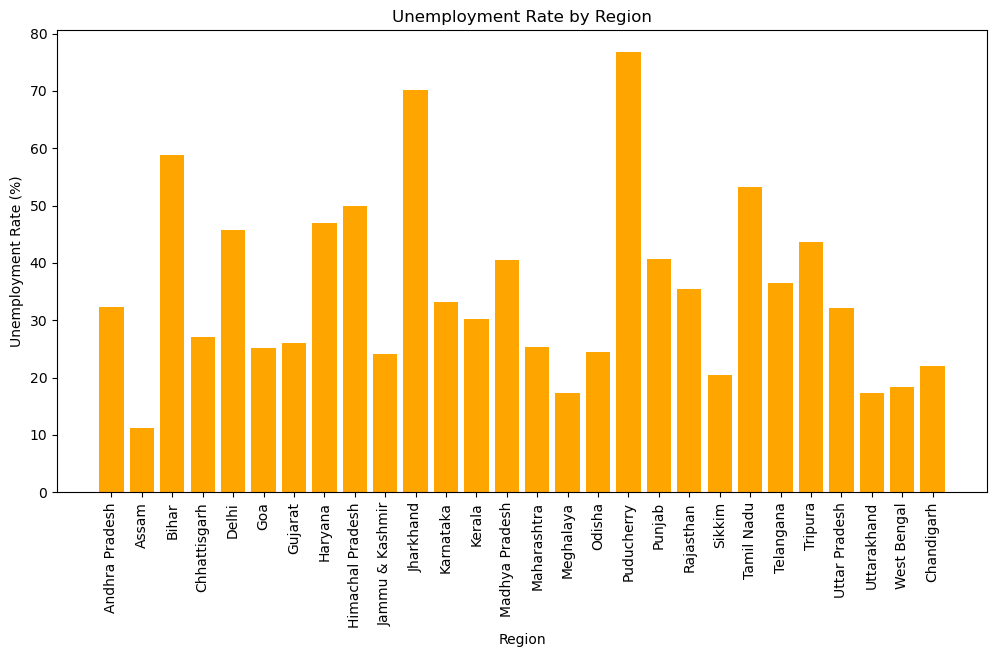

In [60]:
plt.figure(figsize=(12, 6))
plt.bar(df['Region'], df['Estimated Unemployment Rate (%)'], color='orange')

plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate by Region')
plt.xticks(rotation=90)

plt.show()


In [62]:
#Average Metrics by Region
avg_metrics = df.groupby('Region')[['Estimated Unemployment Rate (%)', 
                                       'Estimated Labour Participation Rate (%)']].mean()

In [64]:
avg_metrics

,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%)
Region,,
Andhra Pradesh,7.477143,39.375714
Assam,6.428077,44.868462
Bihar,18.918214,38.153929
Chandigarh,15.991667,39.336667
Chhattisgarh,9.240357,42.810714
Delhi,16.495357,38.929643
Goa,9.274167,39.249583
Gujarat,6.663929,46.101071
Haryana,26.283214,42.737143


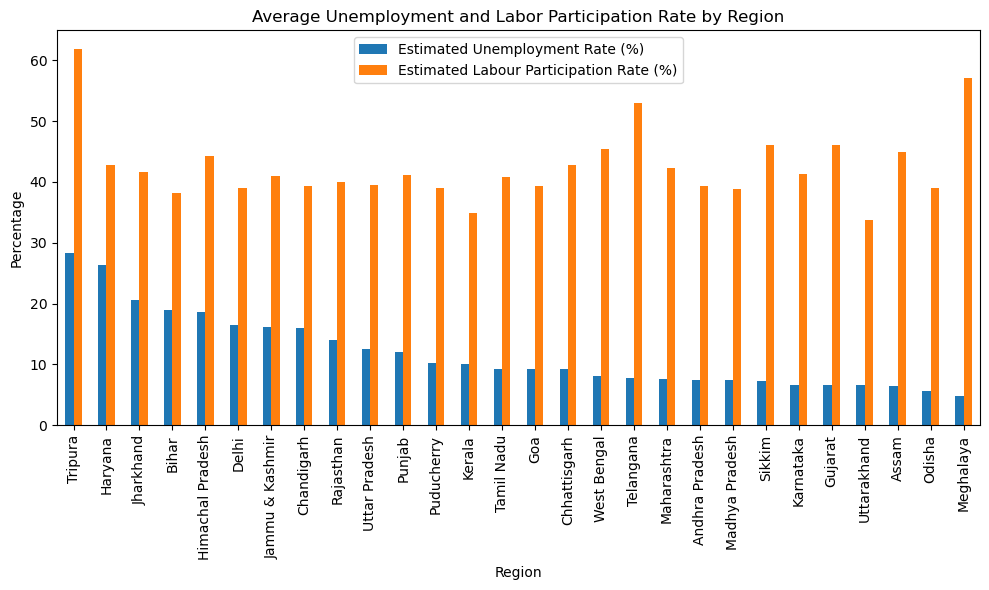

In [72]:
# 3. Average Unemployment Rate Plot
avg_metrics.sort_values(by="Estimated Unemployment Rate (%)", ascending=False).plot(kind="bar", figsize=(10, 6))
plt.title("Average Unemployment and Labor Participation Rate by Region")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

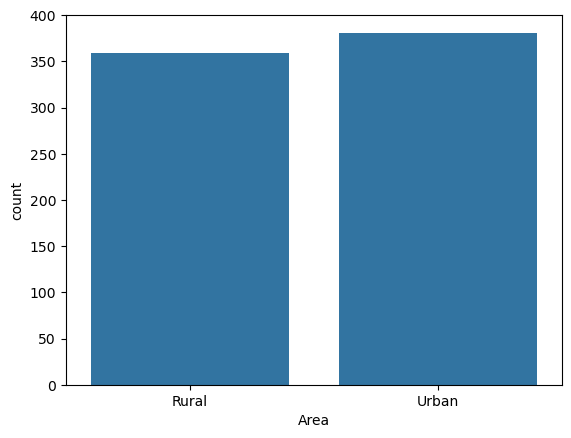

In [78]:
#Area-wise Data
df["Area"].value_counts()
sns.countplot(x="Area",data=df)
plt.show()

In [92]:
top_regions=df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(5)

In [104]:
top_regions

Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Name: Estimated Unemployment Rate (%), dtype: float64

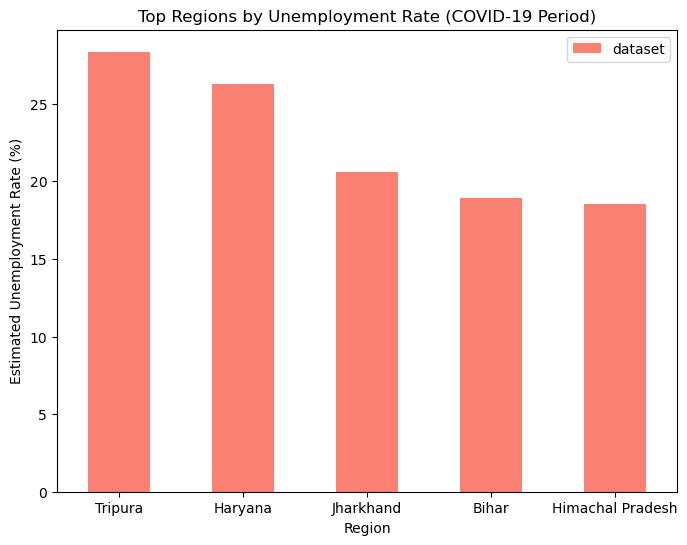

In [106]:
plt.figure(figsize=(8, 6))
top_regions.plot(kind='bar', color='salmon', label='dataset')
plt.title('Top Regions by Unemployment Rate (COVID-19 Period)')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.legend()

plt.show()


In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(region_means[['Estimated Unemployment Rate (%)']])


In [138]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Set `n_init` to avoid warning
region_means['cluster'] = kmeans.fit_predict(data_scaled)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [144]:
print(region_means)

              Region  Estimated Unemployment Rate (%)  cluster
0     Andhra Pradesh                         7.477143        1
1              Assam                         6.428077        1
2              Bihar                        18.918214        0
3         Chandigarh                        15.991667        0
4       Chhattisgarh                         9.240357        1
5              Delhi                        16.495357        0
6                Goa                         9.274167        1
7            Gujarat                         6.663929        1
8            Haryana                        26.283214        2
9   Himachal Pradesh                        18.540357        0
10   Jammu & Kashmir                        16.188571        0
11         Jharkhand                        20.585000        0
12         Karnataka                         6.676071        1
13            Kerala                        10.123929        1
14    Madhya Pradesh                         7.406429  

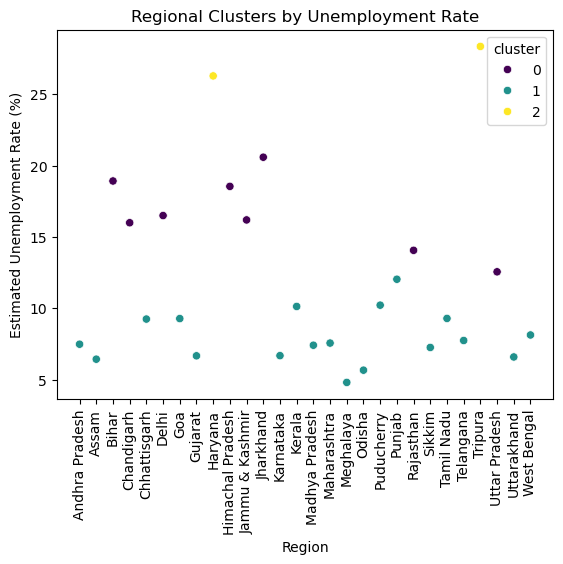

In [148]:
sns.scatterplot(data=region_means, x='Region', y='Estimated Unemployment Rate (%)', hue='cluster', palette='viridis')
plt.xticks(rotation=90)
plt.title('Regional Clusters by Unemployment Rate')
plt.show()